<a href="https://colab.research.google.com/github/texaschikkita/Project-4/blob/main/Jessica_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('pregnancy-risk.csv')


In [ ]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import chardet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras

import tensorflow as tf

from IPython.display import clear_output
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
# View the first few rows of the DataFrame
print(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Information on the DataFrame including the data types of each column
print(df.info())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    9

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

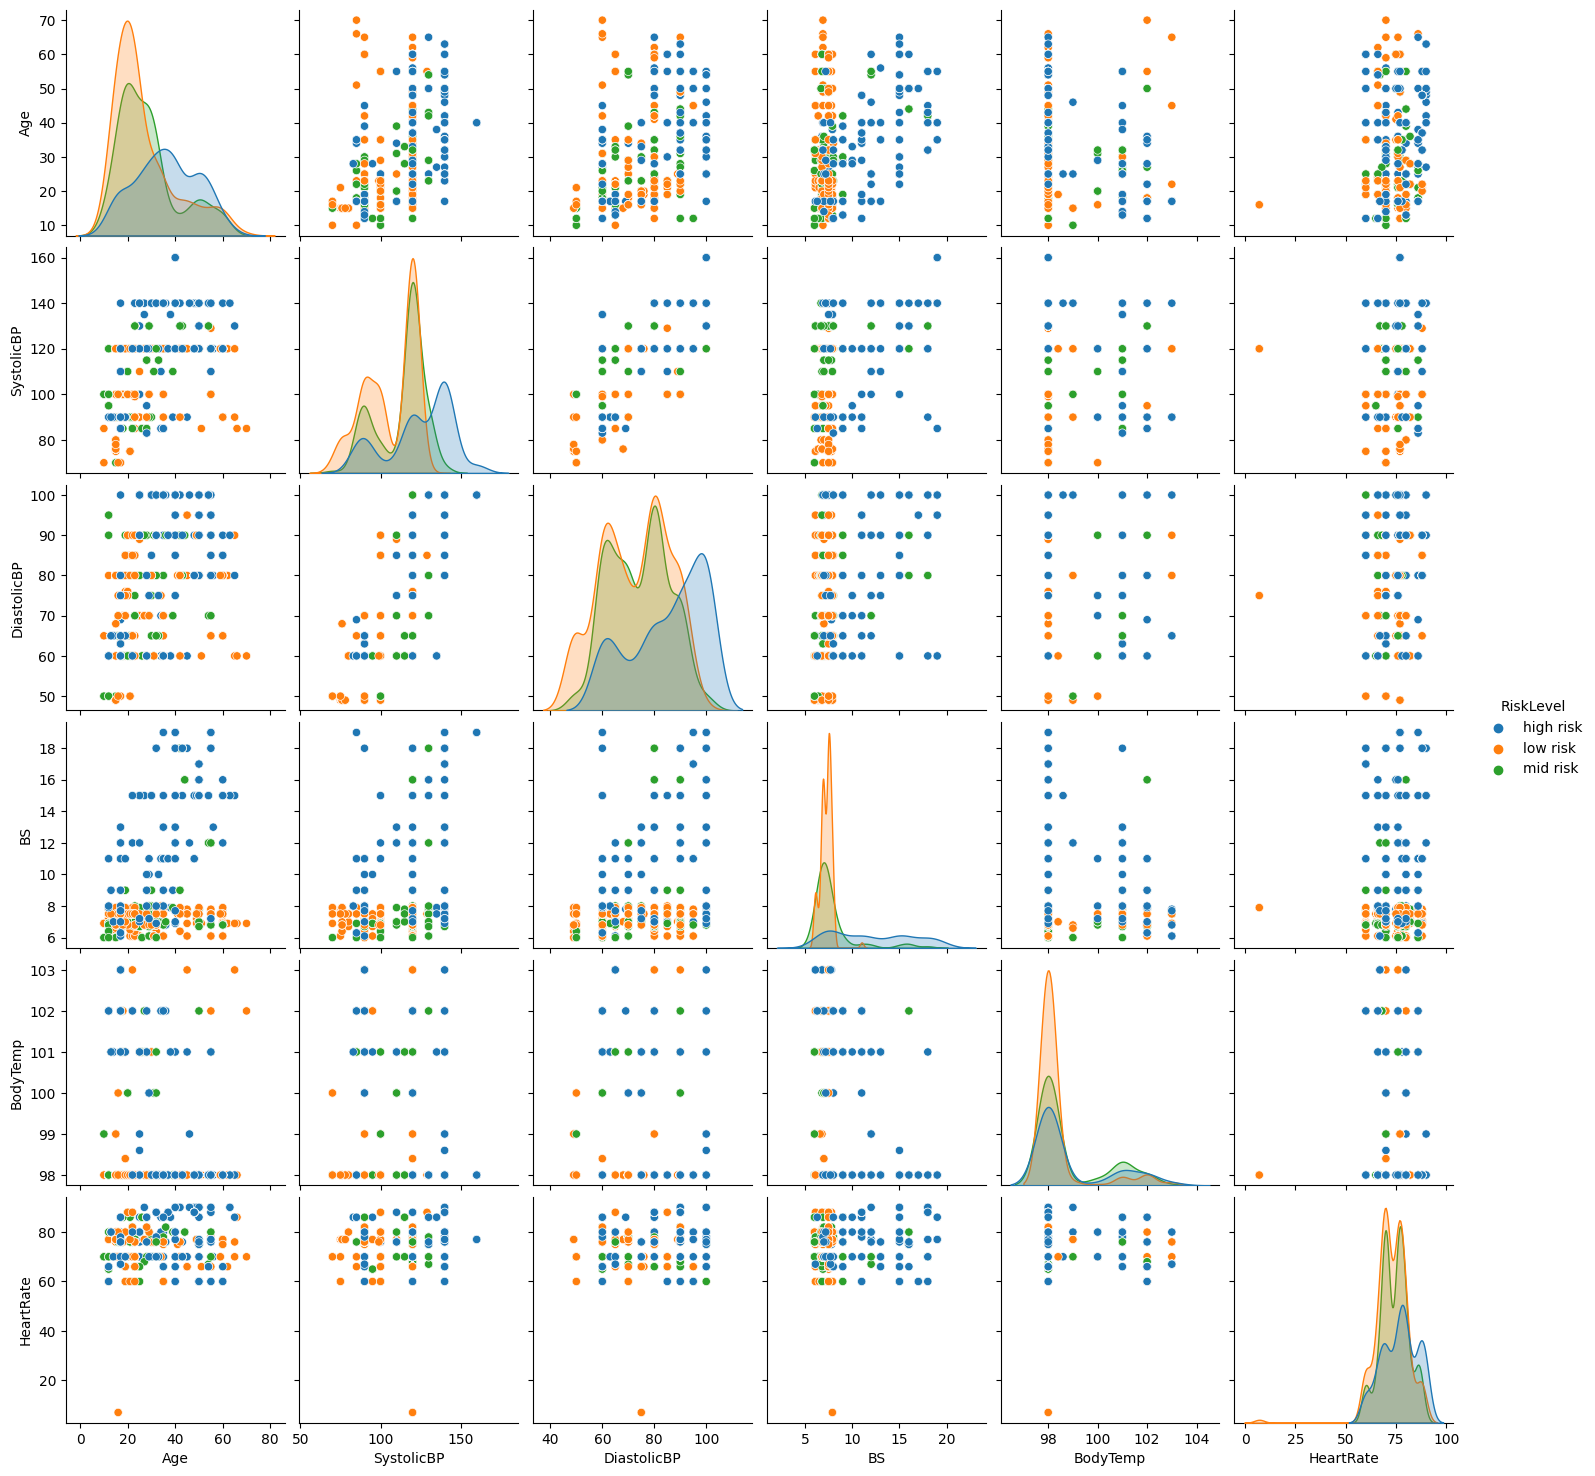

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.pairplot(df, hue="RiskLevel")
plt.show()
# Save the plot as a .png file
plt.savefig('Pairplot.png')

In [ ]:
from google.colab import files
files.download('Pairplot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-db3c3f21448e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


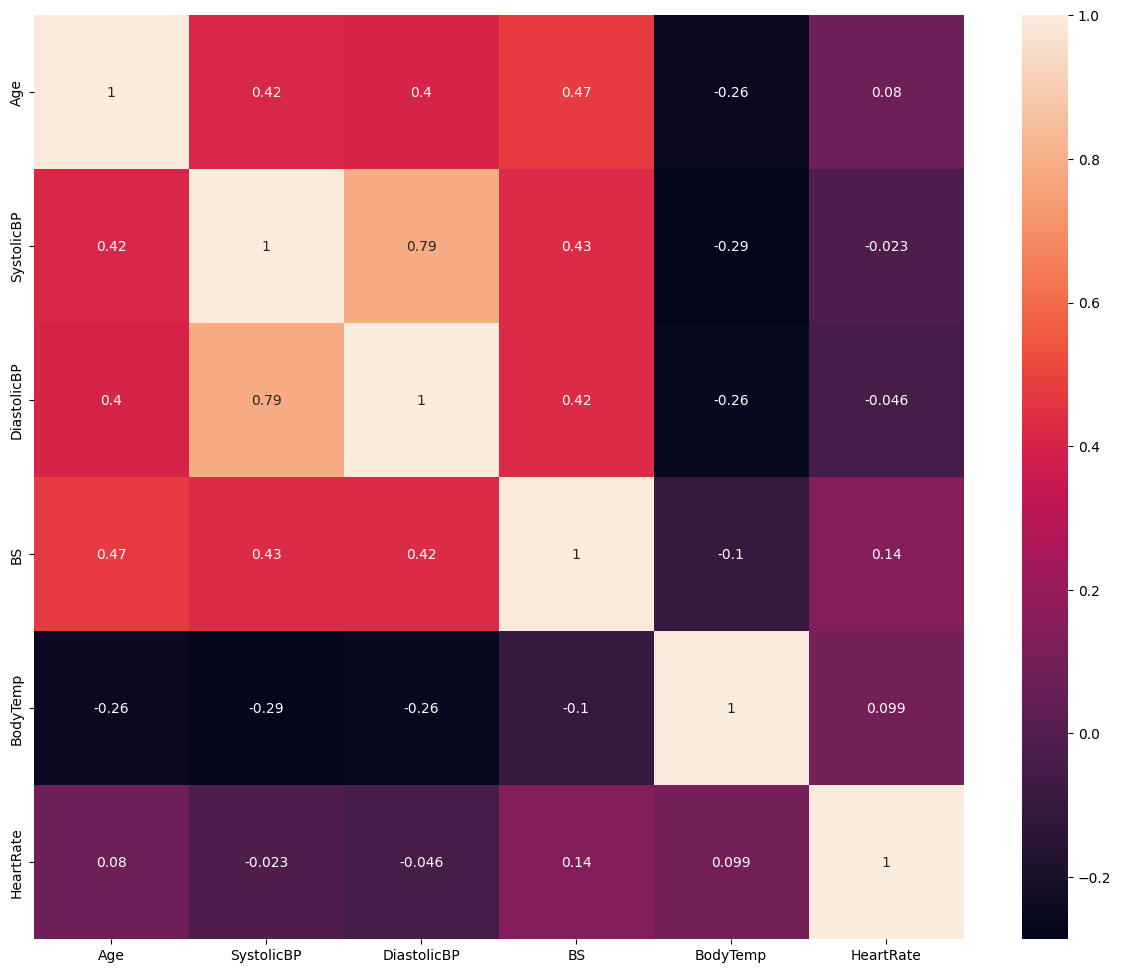

<Figure size 640x480 with 0 Axes>

In [ ]:
# Correlation HeatMap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()
# Save the plot as a .png file
plt.savefig('Corrheat.png')

In [ ]:
from google.colab import files
files.download('Corrheat.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Missing values:")
print(df.isna().sum())

Missing values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
X_dev = df.iloc[:,:-1]
y_dev = df.iloc[:,-1]

In [ ]:
print("Number of each label in the dataset:")
print(np.unique(y_dev, return_counts=True))

Number of each label in the dataset:
(array(['high risk', 'low risk', 'mid risk'], dtype=object), array([272, 406, 336]))


In [ ]:
y_dev[np.where(y_dev == "low risk")[0]] = 0
y_dev[np.where(y_dev == "mid risk")[0]] = 1
y_dev[np.where(y_dev == "high risk")[0]] = 2

<ipython-input-15-2ae14d72daeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_dev[np.where(y_dev == "low risk")[0]] = 0
<ipython-input-15-2ae14d72daeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_dev[np.where(y_dev == "mid risk")[0]] = 1
<ipython-input-15-2ae14d72daeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_dev[np.where(y_dev == "high risk")[0]] = 2


In [ ]:
print(np.unique(y_dev))


[0 1 2]


This code block is using a machine learning technique called cross-validation to estimate the performance of an XGBoost classifier on a dataset (`X_dev`, `y_dev`). Here's a step-by-step explanation:

1. **Import necessary modules:** It starts by importing the required modules: `Pipeline` from `sklearn.pipeline`, `cross_val_score` from `sklearn.model_selection`.

2. **Define the pipeline:** Then it sets up a `Pipeline` that first scales the features using a `MinMaxScaler` and then applies an `XGBClassifier` to the scaled features.

3. **Setup Cross Validation:** It initializes a stratified K-fold cross-validation object with 10 splits. Stratified K-fold CV is a type of CV where the proportion of each class is preserved in each fold to ensure that one class of data is not overrepresented especially when the target variable is imbalanced.

4. **Cross-Validation:** It uses `cross_val_score` to perform the stratified K-fold cross-validation on the dataset using the pipeline. This involves splitting the data into 10 parts, then running the pipeline on 9 parts and validating on the 1 left out part, repeating this process for each part. The `cross_val_score` returns a list of scores, one for each fold.

5. **Print Accuracy Scores:** The accuracy score for each fold and the mean accuracy across all folds are printed.

6. **Train and Predict:** The pipeline is then fitted to the entire dataset and used to generate class probabilities with the `predict_proba` method. The predicted class is the one with the highest probability.

7. **Confusion Matrix:** A confusion matrix is generated from the true class labels and the predicted class labels. The confusion matrix is a 2D array where the entries `C[i, j]` are the number of observations known to be in group `i` but predicted to be in group `j`. It's displayed as a heatmap.

The `normalize='all'` argument in the `confusion_matrix` function ensures that the values displayed in the confusion matrix are the proportions of the corresponding class occurrences rather than the raw counts, giving an understanding of the classifier performance in terms of proportions or percentages.

This code block provides a robust way to estimate the performance of a model with the benefit of preprocessing and model in a pipeline and performing cross-validation to mitigate overfitting.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Cross-validation scores:  [0.94117647 0.99019608 0.80392157 0.59803922 0.53465347 0.9009901
 0.85148515 0.73267327 0.76237624 0.83168317]
Mean cross-validation accuracy:  0.7947194719471946


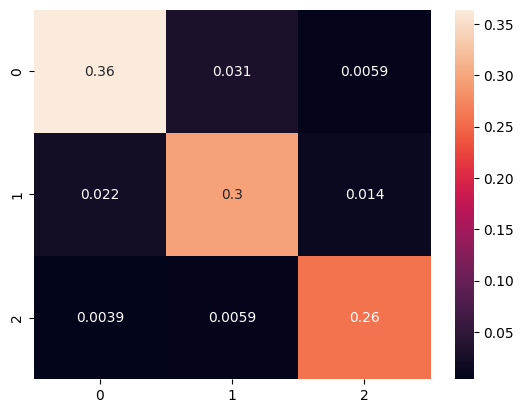

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', xgboost.XGBClassifier(n_estimators=750, max_depth=7, eta=0.1, 
                                         subsample=0.3, colsample_bytree=0.4, 
                                         objective="multi:softmax", verbosity=0, 
                                         use_label_encoder=False))
])

skf = StratifiedKFold(n_splits=10)

# Run the cross-validation
scores = cross_val_score(pipe, X_dev, y_dev.astype("category"), cv=skf)

# Print the accuracy for each fold
print("Cross-validation scores: ", scores)

# Calculate and print the mean accuracy across all folds
print("Mean cross-validation accuracy: ", np.mean(scores))

# Fit the pipeline on the entire dataset and generate predictions
pipe.fit(X_dev, y_dev.astype("category"))
y_prob = pipe.predict_proba(X_dev)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_dev.astype("category"), np.argmax(y_prob, axis=1), 
                             normalize='all'), annot=True)
plt.show()
# Save the plot as a .png file
plt.savefig('confusionheat.png')

In [ ]:
from google.colab import files
files.download('confusionheat.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The code below is a Python function that defines a configurable neural network model using Keras. Here's a breakdown of what it does:

1. The function `neural_network` takes three parameters:
   - `input_dim` is the dimensionality of the input data (i.e., the number of features your data has).
   - `output_dim` is the dimensionality of the output data (i.e., the number of classes in your classification problem).
   - `layers` is a list of tuples. Each tuple contains two elements: the number of neurons (also called units) for the layer, and the dropout fraction for the layer.

2. `model = Sequential()` initializes a new Sequential model. A Sequential model is a linear stack of layers in which you can just add layers on top of each other.

3. The function then iterates over the `layers` list. For each layer, it does the following:
   - It unpacks the tuple into the number of neurons and the dropout fraction (`neurons, dropout_frac = layer`).
   - If it's the first layer (`i == 0`), it adds a Dense layer with the specified number of neurons, the 'relu' activation function, and specifies that the input dimension is `input_dim`. This is needed for the first layer so that Keras knows the input shape of the data.
   - If it's not the first layer, it adds a Dense layer with the specified number of neurons and the 'relu' activation function.
   - After each Dense layer, it adds a Dropout layer with the specified dropout fraction. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 during training.

4. After all the hidden layers have been added, it adds a final Dense layer with a number of units equal to `output_dim` and the 'softmax' activation function. This is the output layer of the model. In a classification problem, `output_dim` is often equal to the number of classes, and the 'softmax' activation function is used to output a probability distribution over the classes.

5. Finally, the function compiles the model with the categorical crossentropy loss function (which is suitable for multi-class classification problems), the accuracy metric, and the Adam optimizer. It then returns the compiled model.

This function provides a flexible way to create a neural network with an arbitrary number of layers, each with its own number of neurons and dropout rate. This allows you to experiment with different architectures more easily.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def neural_network(input_dim, output_dim, layers):
    model = Sequential()

    for i, layer in enumerate(layers):
        neurons, dropout_frac = layer
        if i == 0:
            model.add(Dense(units=neurons, activation='relu', input_dim=input_dim))
        else:
            model.add(Dense(units=neurons, activation='relu'))
        model.add(Dropout(dropout_frac))

    model.add(Dense(units=output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model


 Create a network with three hidden layers of sizes 512, 1024, and 512, with dropout fractions of 0.2, 0.3, and 0.4, you could call the function like this:

In [ ]:
model = neural_network(input_dim=10, output_dim=2, layers=[(512, 0.2), (1024, 0.3), (512, 0.4)])


This code below defines a custom callback class `PlotLosses` using TensorFlow's Keras API, which is used to visualize the training and validation losses after each epoch during the training of a neural network model.

Here's a breakdown of what it does:

- `class PlotLosses(tf.keras.callbacks.Callback):` defines a new class `PlotLosses` that inherits from the `tf.keras.callbacks.Callback` class, meaning it can be used as a callback during model training in Keras.

- `def on_train_begin(self, logs={}):` is a method that is called at the beginning of training. It initializes several instance variables to store the epoch number (`self.i`), the epoch numbers (`self.x`), the training losses (`self.losses`), and the validation losses (`self.val_losses`). It also sets up a new figure for plotting (`self.fig`) and a list to store the logs (`self.logs`).

- `def on_epoch_end(self, epoch, logs={}):` is a method that is called at the end of each epoch. It updates the instance variables with information from the completed epoch (the epoch number and the training and validation losses). It then clears the output of the Jupyter cell (`clear_output(wait=True)`) and plots the training and validation losses so far. The `wait=True` argument means that it will wait to clear the output until new output is available to replace it. It then displays the plot using `plt.show()`.

- `plot_losses = PlotLosses()` creates an instance of the `PlotLosses` class. You can then pass `plot_losses` as a callback when you call the `fit` method to train your model.

In summary, this code allows you to visualize the progress of your model's training process by plotting the training and validation losses after each epoch. This is useful for monitoring the model's learning process and diagnosing issues like overfitting (if the validation loss starts to increase while the training loss continues to decrease).

In [ ]:
class PlotLosses(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

## **bold text**  NEURAL NETWORK

The provided code block below  is performing a stratified k-fold cross-validation using a neural network model to train and evaluate a multiclass classification model. Here are the specific steps:

1. The necessary libraries and functions are imported. These are required for k-fold cross-validation, metrics calculation (accuracy, confusion matrix), the XGBoost algorithm, stratified k-fold cross-validation, data scaling (MinMaxScaler), and time handling.

2. An instance of `StratifiedKFold` is created with `n_splits=10`, meaning the data will be divided into 10 parts, maintaining the same class proportion in each split as the complete dataset.

3. The number of folds or splits to be generated from the given data is calculated with `skf.get_n_splits(X_dev, y_dev)`.

4. Inside the loop `for train_index, val_index in skf.split(X_dev, y_dev.astype("category")):`, stratified k-fold cross-validation is performed. For each iteration, the function generates a new set of indices for the training and validation splits.

5. The targets `y_dev` are transformed into one-hot encoded format using `tf.keras.utils.to_categorical(y_dev)`.

6. For each iteration, the code scales the training and validation data using `MinMaxScaler()`, which scales and translates each feature individually so that it lies between a given range on the training set (usually 0 to 1).

7. A neural network model is created with the function `neural_network()`, using the number of columns of `X_train` as the input dimension and the number of columns of `y_dev_ohe` as the output dimension.

8. The model is then trained using the scaled training data, with the scaled validation data used for validation in each epoch. The training is set to run for 150 epochs, with a batch size of 64. A custom Keras callback `plot_losses` is used, which is expected to provide live plotting of losses during the model training.

9. The model's predictions for the validation set are obtained by `model.predict(X_val_scaled)`.

10. Then, it calculates the accuracy of the model's predictions using `accuracy_score()` function and prints it out. The accuracy is calculated by comparing the model's predicted class labels with the true class labels. Here, `np.argmax(y_val,axis=1)` and `np.argmax(y_val_hat,axis=1)` are used to convert the one-hot encoded labels back into class labels.

11. A confusion matrix is plotted to visualize the performance of the classifier. This matrix indicates the number of correct and incorrect predictions made by the classifier, broken down by each class. This is done using the `sns.heatmap()` function from the seaborn library which creates a heatmap representation of data.

12. Finally, a delay of 3 seconds is introduced before the next iteration using `time.sleep(3)` to probably let the user view the plotted confusion matrix before it gets replaced.

Overall, this script allows one to use stratified k-fold cross-validation to train and evaluate a neural network model, providing a live plot of losses during training and visualizing the model's performance using a confusion matrix after each fold.

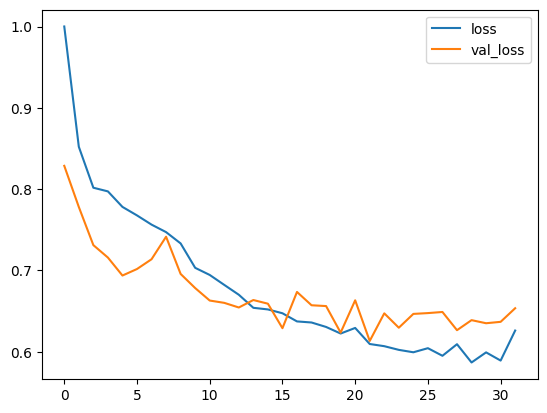

4/4 [==============================] - 0s 6ms/step
0.7425742574257426


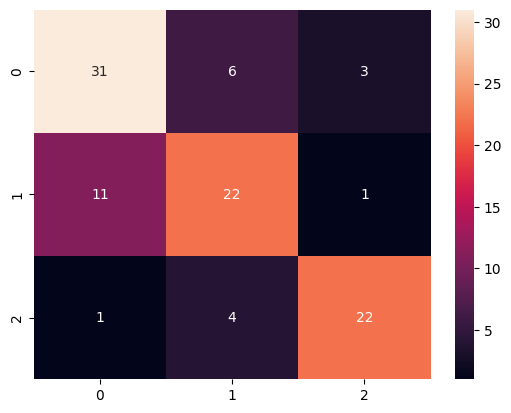

<Figure size 640x480 with 0 Axes>

In [ ]:
import time

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

def create_model(input_dim, output_dim, dropout_frac=0.2, 
                 number_neurons1=512, number_neurons2=1024, number_neurons3=512):
    inputs = Input(shape=(input_dim,))
    x = Dense(number_neurons1, activation='relu')(inputs)
    x = Dropout(dropout_frac)(x)
    x = Dense(number_neurons2, activation='relu')(x)
    x = Dropout(dropout_frac)(x)
    x = Dense(number_neurons3, activation='relu')(x)
    x = Dropout(dropout_frac)(x)
    outputs = Dense(output_dim, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

# Create a label encoder for encoding labels into integers.
label_encoder = LabelEncoder()
y_dev_encoded = label_encoder.fit_transform(y_dev)

skf = StratifiedKFold(n_splits=10)

for train_index, val_index in skf.split(X_dev, y_dev_encoded):
    X_train, X_val = X_dev.iloc[train_index], X_dev.iloc[val_index]
    y_train, y_val = y_dev_encoded[train_index], y_dev_encoded[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    y_train_ohe = tf.keras.utils.to_categorical(y_train)
    y_val_ohe = tf.keras.utils.to_categorical(y_val)

    model = create_model(X_train_scaled.shape[1], y_train_ohe.shape[1])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(X_train_scaled, y_train_ohe, 
              validation_data=(X_val_scaled, y_val_ohe), 
              epochs=100, 
              batch_size=64, 
              callbacks=[early_stopping, plot_losses])

    y_val_hat = model.predict(X_val_scaled)
    print(accuracy_score(np.argmax(y_val_ohe, axis=1), np.argmax(y_val_hat, axis=1)))
    sns.heatmap(confusion_matrix(np.argmax(y_val_ohe, axis=1), np.argmax(y_val_hat, axis=1)), annot=True)
    plt.show()
    time.sleep(3)
# Save the plot as a .png file
plt.savefig('creatmodel.png')

    


In [ ]:
from google.colab import files
files.download('createmodel.png')

In [ ]:
# For numerical columns
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df = pd.get_dummies(df)


<ipython-input-26-f1476c780a0c>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df)


In [ ]:
print(df.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_0', 'RiskLevel_1', 'RiskLevel_2'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'target' is the column with the target variable and the rest are features
X = df.drop('RiskLevel_2', axis=1)
y = df['RiskLevel_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming X_train and X_test are your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga', max_iter=10000)
model.fit(X, y)
print(model)

LogisticRegression(max_iter=10000, solver='saga')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have a feature matrix X and target vector y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)


Model Accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This code below is using the Synthetic Minority Over-sampling Technique (SMOTE) from the `imbalanced-learn` library to balance an imbalanced dataset. 

Imbalanced datasets are a common problem in machine learning, especially in classification tasks, where the classes are not equally represented. For example, in a binary classification problem, you might have 100 instances of class A and only 10 instances of class B. This imbalance can cause a model to predict poorly, especially for the minority class.

The SMOTE technique works by generating new instances of the minority class. These new instances are not just copies of existing instances, but are created by interpolating between existing instances.

The specific steps in the code are:

1. The distribution of the classes in the original dataset is printed (`Counter(y)`).

2. A SMOTE object is created with a specified random state for reproducibility (`SMOTE(random_state=42)`).

3. The SMOTE object is used to fit the original feature and target data (`X` and `y`), and create a resampled feature and target dataset (`X_res` and `y_res`). The resampled data should have balanced classes.

4. The distribution of the classes in the resampled dataset is printed (`Counter(y_res)`).

This is typically done before training a machine learning model, to ensure that the model is trained on a balanced dataset and performs well across all classes.


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# assuming X is your feature set and y are the labels
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 742, 1: 272})
Resampled dataset shape Counter({1: 742, 0: 742})


In [ ]:
# Assuming you have some new data in a pandas DataFrame called df_new_data
df_new_data = df.copy()


In [ ]:
df_new_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_0,RiskLevel_1,RiskLevel_2
0,25,130,80,15.0,98.0,86,0,0,1
1,35,140,90,13.0,98.0,70,0,0,1
2,29,90,70,8.0,100.0,80,0,0,1
3,30,140,85,7.0,98.0,70,0,0,1
4,35,120,60,6.1,98.0,76,1,0,0


In [ ]:
# Data Table Display
from google.colab import data_table
data_table.enable_dataframe_formatter()

# from google.colab import data_table
#data_table.disable_dataframe_formatter()


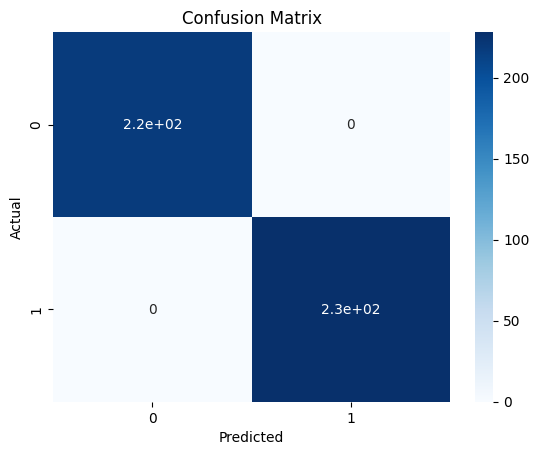

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Feature importances: [0.0452761  0.12578174 0.07053471 0.24461898 0.02632098 0.02266753
 0.21908347 0.24571649]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# 2. Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = clf.predict(X_test)

# 4. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

# 6. Model Interpretation (Feature Importance)
importances = grid_search.best_estimator_.feature_importances_
print("Feature importances:", importances)

# 7. Prediction with New Data
y_pred_new = grid_search.predict(X_new)


In [ ]:
#  new data is a pandas DataFrame named df_new_data
# list of the names of the columns (features) that were used for training the model
features_used_for_training = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel_1', 'RiskLevel_2']

# Select only the columns that were used for training
df_new_data = df_new_data[features_used_for_training]

# Convert the processed DataFrame to numpy array for prediction
X_new = df_new_data.values

# Make prediction
y_pred_new = grid_search.predict(X_new)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler

# ... (previous code for model training and hyperparameter tuning)

# 6. Scale the New Data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)  # Apply scaling to the training data
X_test_scaled = sc.transform(X_test)  # Apply scaling to the test data

# ... (continue with model evaluation and interpretation)

# Prediction with New Data
X_new_scaled = sc.transform(X_new)  # Apply the same scaler to the new data
y_pred_new = grid_search.predict(X_new_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# set feature names
feature_names = df_new_data.columns.tolist()

In [ ]:
# see list
column_names = df_new_data.columns
print(column_names)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_1', 'RiskLevel_2'],
      dtype='object')


In [ ]:
# set high risk (risk level 2) as target 
feature_names = df_new_data.drop('RiskLevel_2', axis=1).columns.tolist()
print(feature_names)

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel_1']


In [ ]:
# set feature importance
feature_importances = dict(zip(column_names, grid_search.best_estimator_.feature_importances_))
print("Feature importances: ", feature_importances)

Feature importances:  {'Age': 0.04527610491180928, 'SystolicBP': 0.12578174376278303, 'DiastolicBP': 0.07053470916129827, 'BS': 0.24461897684334694, 'BodyTemp': 0.026320975427494675, 'HeartRate': 0.02266752938454012, 'RiskLevel_1': 0.21908346612987034, 'RiskLevel_2': 0.2457164943788575}


In [ ]:
# scaling 
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 2. Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# 3. Model Evaluation
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       228

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446

Accuracy: 1.0


In [ ]:
# 4. Hyperparameter Tuning
# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)
print("Best parameters found: ",grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a machine learning model. The goal is to find the hyperparameter values that optimize the model's performance on a given metric, such as accuracy or F1 score.

In the provided code, the `GridSearchCV` class from scikit-learn is used for hyperparameter tuning. It performs an exhaustive search over a specified parameter grid and evaluates the model's performance using cross-validation.

After fitting the `GridSearchCV` model on the training data, the best hyperparameters are obtained using the `best_params_` attribute. The code snippet below demonstrates how to access the best hyperparameters:


The output will display the best parameter values found during the grid search.

The importance of hyperparameter tuning is to find the optimal configuration of hyperparameters that can lead to better model performance. By tuning hyperparameters, you can improve the model's ability to generalize and make accurate predictions on unseen data.

Understanding the specific meaning and impact of each hyperparameter requires knowledge about the algorithm being used. In the case of the RandomForestClassifier, some of the commonly tuned hyperparameters are:

- `n_estimators`: The number of decision trees in the random forest. Increasing the number of trees can improve performance, but it also increases training time.
- `max_depth`: The maximum depth of each decision tree. Increasing the depth can lead to overfitting, while limiting the depth can prevent overfitting but may reduce model performance.
- `min_samples_split`: The minimum number of samples required to split an internal node. It controls the trade-off between underfitting and overfitting.

By tuning these hyperparameters, you can explore different trade-offs between model complexity and performance. The best hyperparameters found during the tuning process are expected to yield improved model performance compared to the default hyperparameter values.

It's important to note that the results of hyperparameter tuning may vary depending on the dataset and the specific problem you are trying to solve. It is recommended to experiment with different hyperparameter configurations and evaluate the performance on validation data or using cross-validation to ensure reliable results.



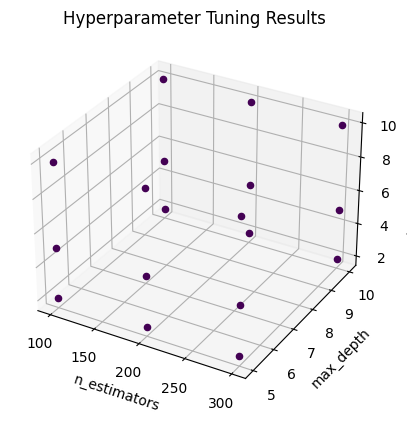

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the hyperparameters and their respective scores
results = grid_search.cv_results_
param_names = list(param_grid.keys())
param_values = [param_grid[param_name] for param_name in param_names]
mean_scores = results['mean_test_score']

# Create a 3D plot for visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperparameters and their scores
for i, param_value in enumerate(param_values[0]):
    for j, param_value_2 in enumerate(param_values[1]):
        for k, param_value_3 in enumerate(param_values[2]):
            score = mean_scores[i * len(param_values[1]) * len(param_values[2]) + j * len(param_values[2]) + k]
            ax.scatter(param_value, param_value_2, param_value_3, c=score, cmap='viridis')

# Set labels and title
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
ax.set_zlabel(param_names[2])
ax.set_title('Hyperparameter Tuning Results')

plt.show()


In [ ]:
# 5. Model Interpretation
importances = grid_search.best_estimator_.feature_importances_
feature_names = df_new_data.columns.tolist()
feature_importances = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)
print(feature_importances)


       feature  importance
7  RiskLevel_2    0.245716
3           BS    0.244619
6  RiskLevel_1    0.219083
1   SystolicBP    0.125782
2  DiastolicBP    0.070535
0          Age    0.045276
4     BodyTemp    0.026321
5    HeartRate    0.022668


In [ ]:
import pandas as pd

# Separate the target variables from the features
target_1 = df_new_data["RiskLevel_1"]
target_2 = df_new_data["RiskLevel_2"]
features = df_new_data.drop(["RiskLevel_1", "RiskLevel_2"], axis=1)

In [ ]:
print(features)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
import pandas as pd

# Separate the target variables from the features
target_1 = df_new_data["RiskLevel_1"]
target_2 = df_new_data["RiskLevel_2"]
features = df_new_data.drop(["RiskLevel_1", "RiskLevel_2"], axis=1)

In [ ]:
print("features_encoded shape:", features_encoded.shape)
print("target_1 shape:", target_1.shape)


features_encoded shape: (8, 8)
target_1 shape: (1014,)


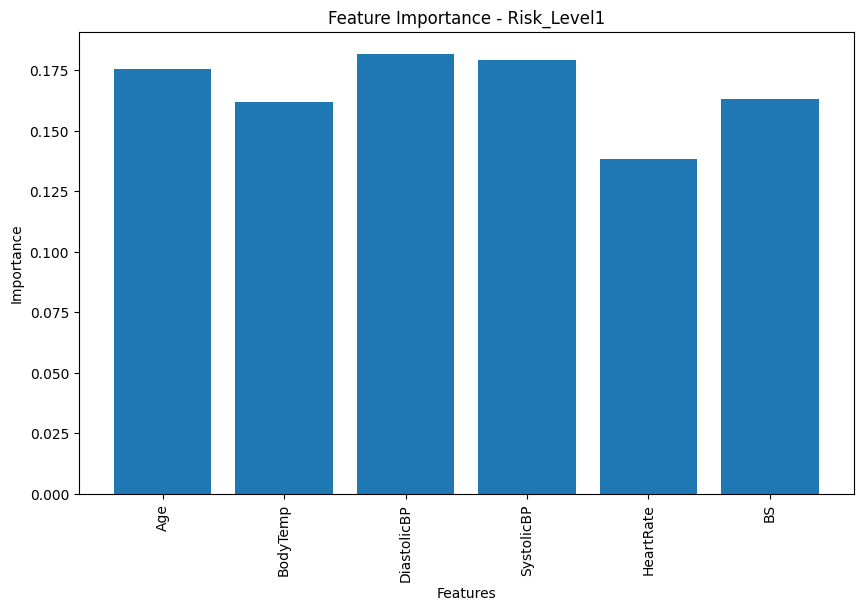

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Select the relevant features and target for Risk_Level1
selected_features = features_encoded[["Age", "BodyTemp", "DiastolicBP", "SystolicBP", "HeartRate", "BS"]]
target = target_1

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(selected_features, target)

# Retrieve feature importances
importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(selected_features.columns, importances)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Risk_Level1')
plt.show()


In [ ]:
print("Selected features shape:", selected_features.shape)
print("Target shape:", target.shape)


Selected features shape: (8, 6)
Target shape: (1014,)


In [ ]:
import numpy as np

# Check for missing values in the selected features
print("Missing values in selected features:", selected_features.isnull().sum().any())

# Check for missing values in the target variable
print("Missing values in target:", target.isnull().sum())

# Drop rows with missing values in the selected features and target variable
selected_features = selected_features.dropna()
target = target.loc[selected_features.index]

# Confirm the aligned dimensions
print("Aligned selected features shape:", selected_features.shape)
print("Aligned target shape:", target.shape)


Missing values in selected features: False
Missing values in target: 0
Aligned selected features shape: (8, 6)
Aligned target shape: (8,)


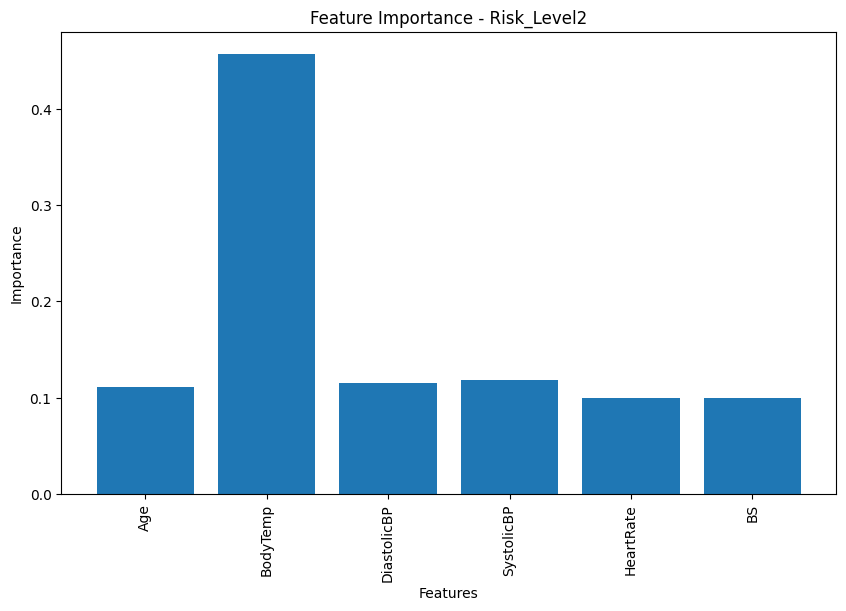

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a RandomForestClassifier for Risk_Level2
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(selected_features, target)

# Retrieve feature importances for Risk_Level2
importances_2 = clf_2.feature_importances_

# Plot feature importances for Risk_Level2
plt.figure(figsize=(10, 6))
plt.bar(selected_features.columns, importances_2)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Risk_Level2')
plt.show()


In [ ]:
import numpy as np

# Check for missing values in features_encoded
print("Missing values in features_encoded:", features_encoded.isnull().sum().any())

# Check for missing values in target_1
print("Missing values in target_1:", target_1.isnull().sum())

# Drop rows with missing values in features_encoded and target_1
features_encoded = features_encoded.dropna()
target_1 = target_1.loc[features_encoded.index]

# Confirm the aligned dimensions
print("Aligned features_encoded shape:", features_encoded.shape)
print("Aligned target_1 shape:", target_1.shape)


Missing values in features_encoded: False
Missing values in target_1: 0
Aligned features_encoded shape: (8, 8)
Aligned target_1 shape: (8,)


In [ ]:
# 5. Model Interpretation
# For a RandomForest model, you can simply print the feature importance like this:
importances = grid_search.best_estimator_.feature_importances_
features = df_new_data.columns.tolist()
feature_importances = pd.DataFrame({"feature": features, "importance": importances}).sort_values("importance", ascending=False)
print(feature_importances)


       feature  importance
7  RiskLevel_2    0.245716
3           BS    0.244619
6  RiskLevel_1    0.219083
1   SystolicBP    0.125782
2  DiastolicBP    0.070535
0          Age    0.045276
4     BodyTemp    0.026321
5    HeartRate    0.022668


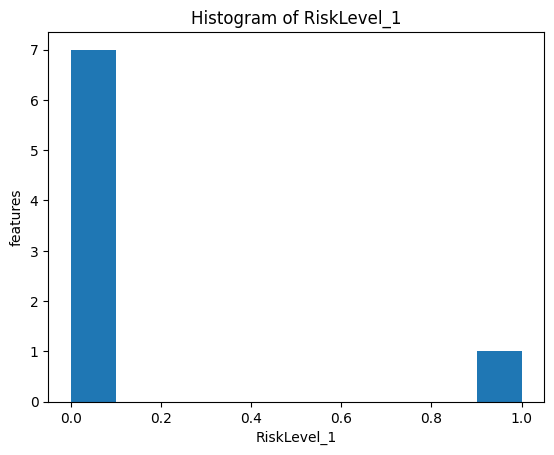

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for target variable - RiskLevel_1
plt.hist(target_1)
plt.xlabel("RiskLevel_1")
plt.ylabel("features")
plt.title("Histogram of RiskLevel_1")
plt.show()

# Plot histogram for target variable - RiskLevel_2


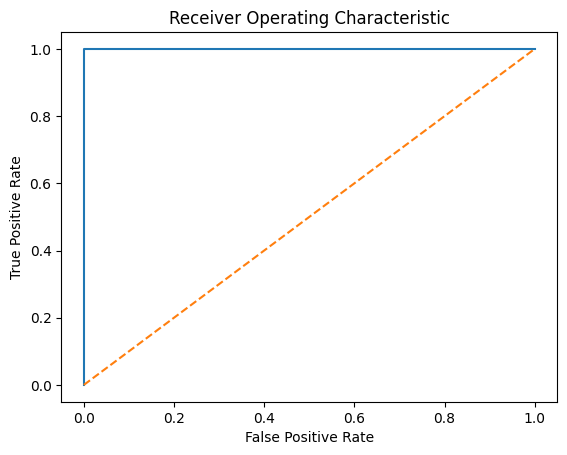

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = clf.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


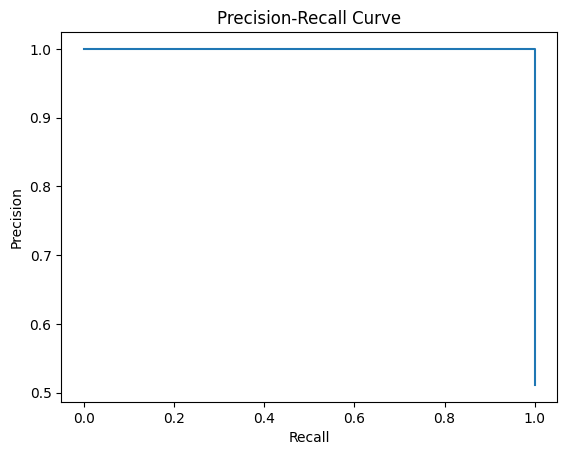

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, probs[:, 1])

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# 6. Prediction
X_new_scaled = sc.transform(X_new)  # Apply the same scaler to the new data
y_pred_new = grid_search.predict(X_new_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# set random froest classifier
from sklearn.ensemble import RandomForestClassifier

# Assuming X_res and y_res are your features and target variable after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df_new_data.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

print(f_importances)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


RiskLevel_2    0.245716
BS             0.244619
RiskLevel_1    0.219083
SystolicBP     0.125782
DiastolicBP    0.070535
Age            0.045276
BodyTemp       0.026321
HeartRate      0.022668
dtype: float64


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# 1. Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# 2. Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 4. Hyperparameter Tuning
# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print("Best parameters found: ",grid_search.best_params_)

# 5. Model Interpretation RandomForest model, you can simply print the feature importance like this:
importances = grid_search.best_estimator_.feature_importances_
print("Feature importances: ", importances)

# 6. Prediction
# Once the model is trained and tuned, use it for prediction.
y_pred_new = grid_search.predict(X_new)  # Using X_new as your new data


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       228

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446

Accuracy: 1.0
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Feature importances:  [0.0452761  0.12578174 0.07053471 0.24461898 0.02632098 0.02266753
 0.21908347 0.24571649]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


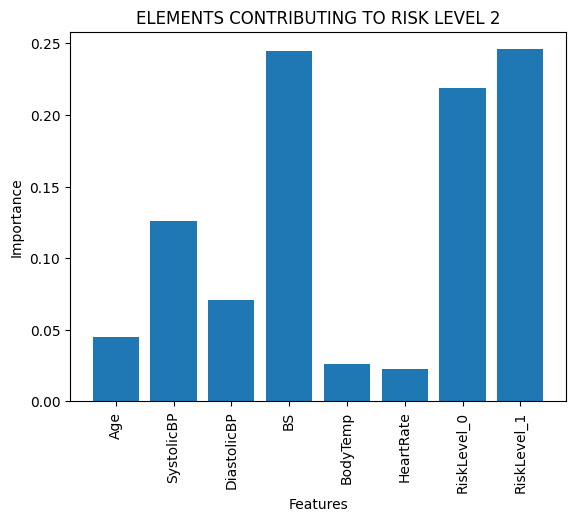

In [ ]:
import matplotlib.pyplot as plt

importances = grid_search.best_estimator_.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('ELEMENTS CONTRIBUTING TO RISK LEVEL 2')
plt.show()


https://nimb.ws/dm0LRA

In [ ]:
import numpy as np 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import chardet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from IPython.display import clear_output
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
# Import data from csv and create a database (including table) and a dataframe.

Path('Pregnancy_Risk.db').touch()
#con = sqlite3.connect("/content/Pregnancy_Risk.db")
con = sqlite3.connect("Pregnancy_Risk.db")
cur = con.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS risk_tb (Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel)''')
df = pd.read_csv('pregnancy-risk.csv')
index = [i + 1 for i in df.index]
df.insert(1, 'index_col', index) # Add a column for index since it was missing from original dataset. 
df.to_sql('risk_tb', con, if_exists='replace', index=False)
pregnancy_risk = pd.read_sql('''SELECT * FROM risk_tb''',con)
pregnancy_risk


,Age,index_col,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,1,130,80,15.0,98.0,86,high risk
1,35,2,140,90,13.0,98.0,70,high risk
2,29,3,90,70,8.0,100.0,80,high risk
3,30,4,140,85,7.0,98.0,70,high risk
4,35,5,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...,...
1009,22,1010,120,60,15.0,98.0,80,high risk
1010,55,1011,120,90,18.0,98.0,60,high risk
1011,35,1012,85,60,19.0,98.0,86,high risk
1012,43,1013,120,90,18.0,98.0,70,high risk


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(pregnancy_risk):
    # Drop column: 'index_col'
    pregnancy_risk = pregnancy_risk.drop(columns=['index_col'])
    return pregnancy_risk

pregnancy_risk_clean = clean_data(pregnancy_risk.copy())
pregnancy_risk_clean.head() 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# View the first few rows of the DataFrame
print(pregnancy_risk_clean.head())

# Summary statistics for numerical columns
print(pregnancy_risk_clean.describe())

# Information on the DataFrame including the data types of each column
print(pregnancy_risk_clean.info())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    9

In [ ]:
pregnancy_risk_clean


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
pregnancy_risk_clean.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
risk = pregnancy_risk_clean.copy()

In [ ]:
# For numerical columns
for col in risk.select_dtypes(include=['float64', 'int64']):
    risk[col].fillna(risk[col].mean(), inplace=True)

# For categorical columns
for col in risk.select_dtypes(include=['object']):
    risk[col].fillna(risk[col].mode()[0], inplace=True)


In [ ]:
risk

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# Define a mapping from risk level to number
risk_mapping = {"high risk": 3, "mid risk": 2, "low risk": 1}

# Replace the risk level categories with numbers
risk["RiskScore"] = risk["RiskLevel"].replace(risk_mapping)


In [ ]:
risk

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskScore
0,25,130,80,15.0,98.0,86,high risk,3
1,35,140,90,13.0,98.0,70,high risk,3
2,29,90,70,8.0,100.0,80,high risk,3
3,30,140,85,7.0,98.0,70,high risk,3
4,35,120,60,6.1,98.0,76,low risk,1
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,3
1010,55,120,90,18.0,98.0,60,high risk,3
1011,35,85,60,19.0,98.0,86,high risk,3
1012,43,120,90,18.0,98.0,70,high risk,3


In [ ]:
dummies = pd.get_dummies(pregnancy_risk_clean)
print(dummies.columns)

from sklearn.model_selection import train_test_split

# Set age as feature
X=dummies.drop(['RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_low risk'], axis=1)
y=dummies[['RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_low risk']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_mid risk'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data, let's use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base classifier
base_classifier = LogisticRegression(max_iter=10000)

# Initialize the multi-output classifier
model = MultiOutputClassifier(base_classifier)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Generate classification report for each output
for i in range(y_test.shape[1]):
    print(f"Classification report for output {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Classification report for output RiskLevel_high risk:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.89      0.83      0.86        47

    accuracy                           0.94       203
   macro avg       0.92      0.90      0.91       203
weighted avg       0.94      0.94      0.94       203

Classification report for output RiskLevel_low risk:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       123
           1       0.88      0.94      0.91        80

    accuracy                           0.93       203
   macro avg       0.92      0.93      0.92       203
weighted avg       0.93      0.93      0.93       203

Classification report for output RiskLevel_low risk:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       123
           1       0.88      0.94      0.91        80

    accuracy          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

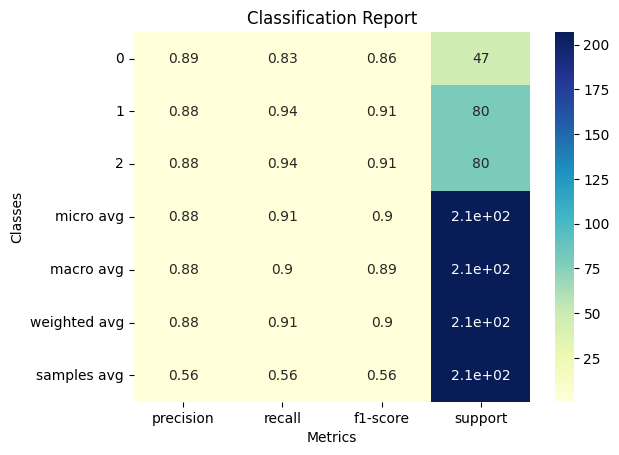

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you already have the true labels (y_test) and predicted labels (y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Create a heatmap visualization
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T, annot=True, cmap="YlGnBu")

# Add labels, title, and formatting
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.title("Classification Report")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your feature data in X and target data in y

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (811, 7)
y_train shape: (811, 3)
X_val shape: (203, 7)
y_val shape: (203, 3)


In [ ]:
import numpy as np
from keras.utils import to_categorical

# Assuming you have your target variable in y_train and y_val

# Calculate the number of unique classes
num_classes = np.unique(y_train).shape[0]

# One-hot encode the target variables
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

print(num_classes)


2


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=0289610b618d3773b65c353b772857cee10d68dd6c4721999b184edfdce7ca7a
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
import torch
from torch_geometric.data import Data

# Generate some random edge indices
num_nodes = 100
num_edges = 200
edge_index = torch.randint(num_nodes, (2, num_edges))

# Create an instance of the GCN model
model = GCN(num_features, hidden_dim, num_classes)

# Generate some random input data
x = torch.randn(num_nodes, num_features)  # Node features

# Forward pass
output = model(x, edge_index)


In [ ]:
output

tensor([ 0.1594, -0.1839, -0.3515,  0.2961, -0.1303, -0.0720,  0.2468,  0.0340,
        -0.2077, -0.1835], grad_fn=<AddBackward0>)

In [ ]:
import torch
from torch_geometric.data import Data

# Generate some random edge indices
num_nodes = 100
num_edges = 200
edge_index = torch.randint(num_nodes, (2, num_edges))

# Convert edge_index to an integer tensor
edge_index = torch.tensor(edge_index, dtype=torch.long)

# Create an instance of the GCN model
model = GCN(num_features, hidden_dim, num_classes)

# Generate some random input data
x = torch.randn(num_nodes, num_features)  # Node features

# Forward pass
output = model(x, edge_index)


<ipython-input-153-c936b47e9ba4>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)


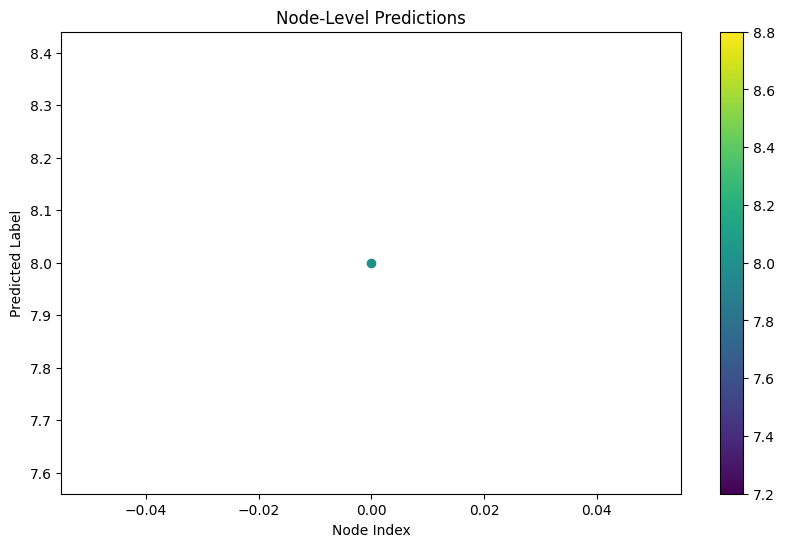

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output contains the predictions from the GCN model
predicted_labels = output.argmax(dim=0)  # Assuming a multi-class classification task

# Convert predicted_labels to a scalar or 1D numpy array
if predicted_labels.dim() == 0:
    predicted_labels = np.array([predicted_labels.item()])
else:
    predicted_labels = predicted_labels.numpy()

# Visualize predicted labels for nodes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predicted_labels)), predicted_labels, c=predicted_labels, cmap='viridis')
plt.xlabel('Node Index')
plt.ylabel('Predicted Label')
plt.title('Node-Level Predictions')
plt.colorbar()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
pr = pd.read_csv('pregnancy-risk.csv')

pr.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('pregnancy-risk.csv')

# Split the dataset into features and target
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Encode the target variable since it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. feature {X.columns[f]} ({importances[f]})")


Feature ranking:
1. feature Age (0.1603197954980063)
2. feature SystolicBP (0.18178519963505102)
3. feature DiastolicBP (0.1180595403067921)
4. feature BS (0.36782972069830266)
5. feature BodyTemp (0.0679628725116956)
6. feature HeartRate (0.10404287135015226)


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


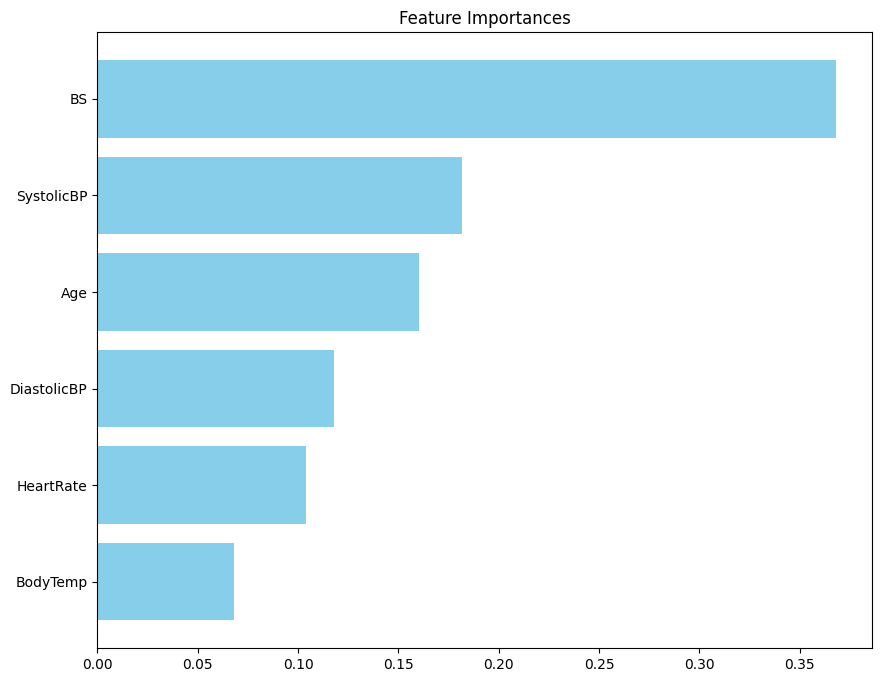

In [ ]:

# Get the feature names
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values("Importance", ascending=False)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a bar plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')

# Set the chart's title
plt.title('Feature Importances')

# Invert the y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()


In [ ]:
https://nimb.ws/1RXnVv